In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# FilePath to Stats

In [3]:
mypath = r"C:\Users\Mummel\Desktop\BeatManiaStats Others"  # write your own path here
onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

In [4]:
onlyfiles
beat_metrics = [f for f in onlyfiles if "Beat_Metric" in f]
combat_metrics = [f for f in onlyfiles if "Combat_Metric" in f]
various_metrics = [f for f in onlyfiles if "Various_Metric" in f]
print(beat_metrics)

['000990_NoRhythm_04_12_21_12_39_Beat_Metric.csv', '000990_RhythmControlled_04_12_21_12_11_Beat_Metric.csv', '061295_NoRhythm_05_12_21_05_27_Beat_Metric.csv', '061295_RhythmControlled_05_12_21_05_53_Beat_Metric.csv', '088835_NoRhythm_21_11_21_05_42_Beat_Metric.csv', '088835_RhythmControlled_21_11_21_05_13_Beat_Metric.csv', '157771_NoRhythm_02_12_21_06_04_Beat_Metric.csv', '157771_RhythmControlled_02_12_21_06_35_Beat_Metric.csv', '198760_NoRhythm_06_12_21_06_35_Beat_Metric.csv', '198760_RhythmControlled_06_12_21_07_06_Beat_Metric.csv', '244206_NoRhythm_03_12_21_03_22_Beat_Metric.csv', '244206_RhythmControlled_03_12_21_03_50_Beat_Metric.csv', '246229_NoRhythm_02_12_21_04_03_Beat_Metric.csv', '246229_RhythmControlled_02_12_21_04_30_Beat_Metric.csv', '288786_NoRhythm_05_12_21_04_49_Beat_Metric.csv', '288786_RhythmControlled_05_12_21_04_21_Beat_Metric.csv', '353252_NoRhythm_05_12_21_04_39_Beat_Metric.csv', '353252_RhythmControlled_05_12_21_04_13_Beat_Metric.csv', '427217_NoRhythm_04_12_21_0

# fix writing mistakes in beat metrics (if you haven't already)

In [173]:

#fix Beat_metric files
already_fixed = 0
NaN_removed = 0
old_version_fixed = 0

def beat_delta_fix(text):
    if "." in text:
        text = text.split(".")[0]
        #print("beat_delta_fix")
    return text

#o = [beat_metrics[7]]
for file in beat_metrics:
    path = os.path.join(mypath, file)
    #print(file)
    if "Beat_Metric" in path:
        try:
            df = pd.read_csv(path,sep=',', skiprows = 2, header = None)
        except:
            df = pd.read_csv(path,sep=',', skiprows = 3, header = None) # remove instances where first data row contains NaN
            NaN_removed += 1
        if len(df.columns) == 10:
            df.columns = ["Version", "Time", "Beathit", "BeatDelta", "BeatDelta2", "BeatLength", "BeatLength2", "ToleranceRange", "ToleranceRange2", "Action"]
            df["BeatDelta2"] = df["BeatDelta2"].astype(str).apply(beat_delta_fix)
            df["BeatDelta"] = df["BeatDelta"].astype(str) + '.' + df.pop("BeatDelta2").astype(str)
            df["BeatLength"] = df["BeatLength"].astype(str) + '.' + df.pop("BeatLength2").astype(str)
            df["ToleranceRange"] = df["ToleranceRange"].astype(str) + '.' + df.pop("ToleranceRange2").astype(str)
            f = open(path,"w")
            f.write("sep=,\n")
            df.to_csv(f, index = False,line_terminator='\n',sep=',')
            f.close()
            old_version_fixed += 1
        else:
            already_fixed += 1

print("NaN removed", NaN_removed)
print("old version fixed", old_version_fixed)
print("already fixed", already_fixed)

NaN removed 0
old version fixed 0
already fixed 42


# BeatMetric Analysis

In [6]:
# beat_metric analysis
path = os.path.join(mypath, beat_metrics[1])
df = pd.read_csv(path,sep=',', skiprows = 1)
print(path)
df

C:\Users\Mummel\Desktop\BeatManiaStats Others\000990_RhythmControlled_04_12_21_12_11_Beat_Metric.csv


Version  Time  Beathit  BeatDelta  BeatLength  ToleranceRange  \
0    RhythmControlled     1     True   0.565948         0.5        0.100000   
1    RhythmControlled     2    False   0.106789         0.5        0.100000   
2    RhythmControlled     2     True   0.456673         0.5        0.100000   
3    RhythmControlled     4     True   0.489761         0.5        0.100000   
4    RhythmControlled     4     True   0.650024         0.5        0.100000   
..                ...   ...      ...        ...         ...             ...   
823  RhythmControlled  1174     True   0.457642         0.5        0.141453   
824  RhythmControlled  1175     True   0.742188         0.5        0.141453   
825  RhythmControlled  1176     True   0.373779         0.5        0.141453   
826  RhythmControlled  1177     True   0.123901         0.5        0.141453   
827  RhythmControlled  1178    False   0.307495         0.5        0.141453   

            Action  
0             Jump  
1      Double Jump  
2      Double Jump  
3             Jump  
4    Player Shield  
..             ...  
823  Player Shield  
824           Jump  
825  Player Shield  
826  Player Shield  
827           Jump  

[828 rows x 7 columns]

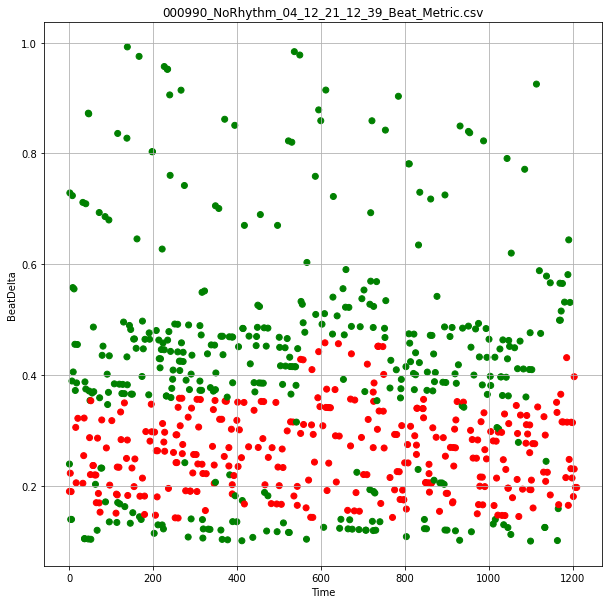

hits: 398/716 = 0.56
hits: 456/828 = 0.55


In [7]:
def files(index):
    df_beat = pd.read_csv(os.path.join(mypath, beat_metrics[index]),sep=',', skiprows = 1)
    df_various = pd.read_csv(os.path.join(mypath, various_metrics[index]),sep=',', skiprows = 1)
    df_combat = pd.read_csv(os.path.join(mypath, combat_metrics[index]),sep=',', skiprows = 1)
    return df_beat, df_various, df_combat
index = 0

df_beat, df_various, df_combat = files(index)
#df = pd.read_csv(os.path.join(mypath, beat_metrics[7]),sep=',', skiprows = 1)


# beat-deltas colored. green is hit and red is no hit
fig, ax=plt.subplots(figsize=(10,10))
colors = np.where(df_beat["Beathit"], "green", "red")
ax.scatter(df_beat["Time"],df_beat["BeatDelta"], color = colors)
ax.set_title(beat_metrics[index])
ax.set_ylabel("BeatDelta")
ax.set_xlabel("Time")
ax.grid(True)
plt.show()

# percantage of hits for rhythm controlled and No Rhythm
def hit_percentage(df_beat):
    hit = np.count_nonzero(df_beat["Beathit"])
    cnt = len(df_beat["Beathit"])
    print(f"hits: {hit}/{cnt} = {round(hit/cnt,2)}")
    
hit_percentage(df_beat)

df_beat, df_various, df_combat = files(index+1)
hit_percentage(df_beat)


In [5]:
beat_metrics_no_rhythm = [f for f in beat_metrics if "NoRhythm" in f]

ar = []
for f in beat_metrics_no_rhythm:
    df_beat = pd.read_csv(os.path.join(mypath, f),sep=',', skiprows = 1)

    hit = np.count_nonzero(df_beat["Beathit"])
    cnt = len(df_beat["Beathit"])
    ar.append(round(hit/cnt,2))

ar = np.array(ar)
print("Beat beat hits No Rhythm",np.average(ar))

beat_metrics_controlled = [f for f in beat_metrics if "Controlled" in f]

ar = []
for f in beat_metrics_controlled:
    df_beat = pd.read_csv(os.path.join(mypath, f),sep=',', skiprows = 1)

    hit = np.count_nonzero(df_beat["Beathit"])
    cnt = len(df_beat["Beathit"])
    ar.append(round(hit/cnt,2))

ar = np.array(ar)
print("Beat beat hits Rhythm Controlled",np.average(ar))
# beat hits in No Rhythm vs in Rhythm Controlled. 
# in Rhythm controlled people hit on the rhythm more. 

Beat beat hits No Rhythm 0.3990476190476191
Beat beat hits Rhythm Controlled 0.5247619047619048


[[0.62 0.66 0.57 0.61 0.56 0.56 0.46 0.58 0.51 0.38]
 [0.41 0.38 0.4  0.35 0.35 0.39 0.4  0.36 0.3  0.38]
 [0.35 0.33 0.46 0.37 0.47 0.39 0.49 0.32 0.49 0.41]
 [0.47 0.34 0.53 0.42 0.45 0.36 0.43 0.34 0.46 0.41]
 [0.39 0.36 0.26 0.42 0.31 0.32 0.37 0.44 0.27 0.35]
 [0.54 0.3  0.32 0.41 0.35 0.42 0.49 0.4  0.4  0.48]
 [0.54 0.43 0.34 0.41 0.34 0.39 0.43 0.34 0.42 0.43]
 [0.44 0.32 0.31 0.36 0.21 0.23 0.31 0.48 0.45 0.41]
 [0.29 0.31 0.34 0.44 0.49 0.5  0.37 0.45 0.36 0.45]
 [0.38 0.35 0.36 0.33 0.42 0.43 0.22 0.47 0.27 0.19]
 [0.44 0.43 0.41 0.43 0.38 0.43 0.42 0.42 0.52 0.4 ]
 [0.44 0.38 0.3  0.41 0.41 0.41 0.35 0.35 0.4  0.37]
 [0.51 0.32 0.38 0.34 0.6  0.42 0.4  0.38 0.25 0.42]
 [0.36 0.4  0.47 0.4  0.32 0.26 0.21 0.31 0.31 0.35]
 [0.29 0.37 0.44 0.38 0.45 0.35 0.44 0.31 0.3  0.41]
 [0.46 0.35 0.45 0.35 0.36 0.48 0.48 0.4  0.5  0.41]
 [0.38 0.39 0.36 0.31 0.35 0.35 0.51 0.42 0.44 0.39]
 [0.41 0.34 0.28 0.31 0.35 0.37 0.4  0.32 0.33 0.38]
 [0.39 0.34 0.19 0.35 0.35 0.33 0.5  0.43 0.4 

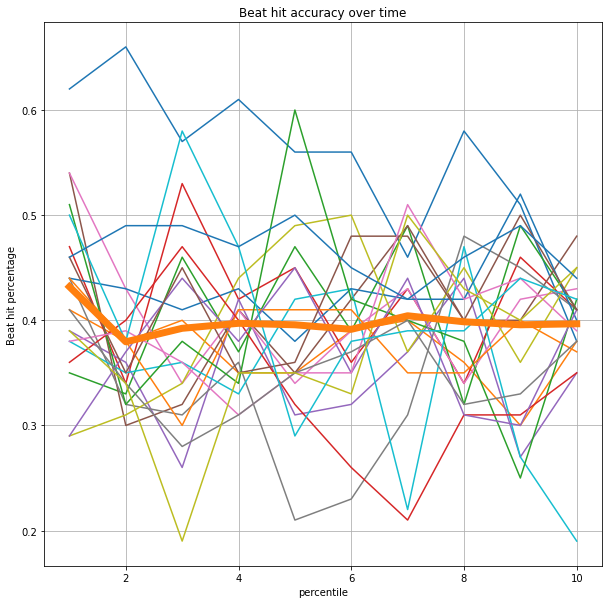

In [20]:
# Beat hits Percentile 
# comparison no rhythm and rhythm controlled. Do they get better? 
fig, ax=plt.subplots(figsize=(10,10))

divisions = 10
all_avg = []
for f in beat_metrics_no_rhythm:
    
    df_beat = pd.read_csv(os.path.join(mypath, f),sep=',', skiprows = 1)
    time = np.array(df_beat["Time"])
    hits = np.array(df_beat["Beathit"])
    percentile = time.max()/divisions
    #print(percentile)
    avg = []
    #print(time.max())
    for i in range(divisions):
        #print(i, "low",i* percentile,"high", (i+1)* percentile)
        time_filter_low = (i* percentile) < time
        time_filter_high = time < ((i+1)* percentile)
        time_filter = np.logical_and(time_filter_low, time_filter_high)
        #print(list(zip(time_filter,time)))
        this_percentile = hits[time_filter]
        #print(len(this_percentile))
        if len(this_percentile) == 0:
            avg.append(0)
        else:
            avg.append(round(np.count_nonzero(this_percentile)/len(this_percentile),2))
    #print(avg)
    ax.plot(np.arange(1,divisions+1),avg)
    all_avg.append(avg)

all_avg = np.array(all_avg)
print(all_avg)
np.mean(all_avg, axis = 0)
ax.plot(np.arange(1,divisions+1),np.mean(all_avg, axis = 0),linewidth=7.0)    
    
ax.set_title("Beat hit accuracy over time")
ax.set_ylabel("Beat hit percentage")
ax.set_xlabel("percentile")
ax.grid(True)
plt.show()    
    

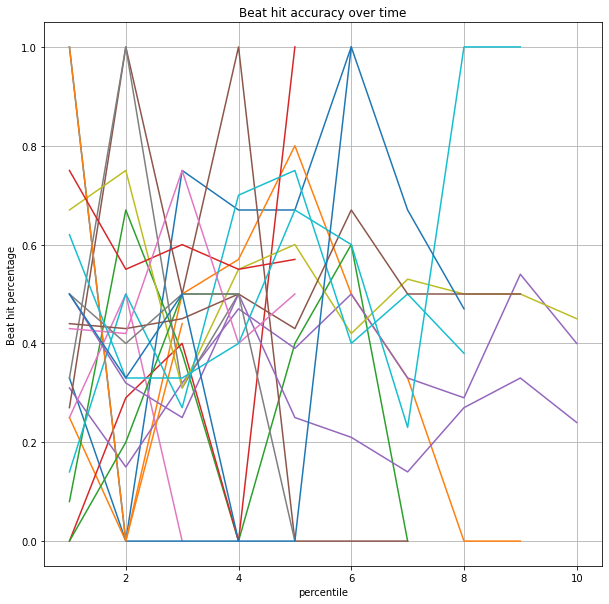

In [27]:
fig, ax=plt.subplots(figsize=(10,10))

divisions = 10
all_avg = []
for f in beat_metrics_controlled:
    
    df_beat = pd.read_csv(os.path.join(mypath, f),sep=',', skiprows = 1)
    df_beat = df_beat[df_beat["Action"].isin(["Player Shield"])]
    time = np.array(df_beat["Time"])
    hits = np.array(df_beat["Beathit"])
    percentile = time.max()/divisions
    #print(percentile)
    avg = []
    #print(time.max())
    for i in range(divisions):
        #print(i, "low",i* percentile,"high", (i+1)* percentile)
        time_filter_low = (i* percentile) < time
        time_filter_high = time < ((i+1)* percentile)
        time_filter = np.logical_and(time_filter_low, time_filter_high)
        #print(list(zip(time_filter,time)))
        this_percentile = hits[time_filter]
        #print(len(this_percentile))
        if len(this_percentile) == 0:
            #avg.append(0)
            pass
        else:
            avg.append(round(np.count_nonzero(this_percentile)/len(this_percentile),2))
    #print(avg)
    ax.plot(np.arange(1,len(avg)+1),avg)
    all_avg.append(avg)

#all_avg = np.array(all_avg)
#print(all_avg)
#np.mean(all_avg, axis = 0)
#ax.plot(np.arange(1,divisions+1),np.mean(all_avg, axis = 0),linewidth=7.0)
ax.set_title("Beat hit accuracy over time")
ax.set_ylabel("Beat hit percentage")
ax.set_xlabel("percentile")
ax.grid(True)
plt.show()  

[[0.76 0.46 0.6  0.56 0.57 0.6  0.62 0.52 0.59 0.62]
 [0.51 0.42 0.49 0.51 0.59 0.71 0.62 0.66 0.69 0.59]
 [0.41 0.35 0.39 0.48 0.41 0.47 0.35 0.5  0.27 0.4 ]
 [0.39 0.33 0.3  0.48 0.44 0.41 0.55 0.5  0.67 0.41]
 [0.55 0.35 0.51 0.52 0.35 0.45 0.53 0.38 0.67 0.4 ]
 [0.56 0.7  0.6  0.74 0.69 0.87 0.8  0.88 0.78 0.76]
 [0.41 0.37 0.29 0.38 0.26 0.42 0.49 0.44 0.4  0.4 ]
 [0.51 0.53 0.33 0.5  0.26 0.41 0.35 0.43 0.4  0.49]
 [0.57 0.69 0.57 0.56 0.53 0.65 0.62 0.65 0.61 0.56]
 [0.32 0.37 0.38 0.33 0.41 0.39 0.46 0.43 0.48 0.55]
 [0.63 0.66 0.64 0.67 0.64 0.54 0.55 0.63 0.58 0.42]
 [0.45 0.62 0.63 0.74 0.58 0.69 0.78 0.88 0.8  0.82]
 [0.64 0.48 0.4  0.46 0.43 0.53 0.63 0.62 0.47 0.48]
 [0.54 0.5  0.6  0.63 0.65 0.53 0.67 0.64 0.52 0.65]
 [0.42 0.26 0.47 0.38 0.25 0.38 0.33 0.44 0.32 0.34]
 [0.63 0.31 0.52 0.59 0.57 0.37 0.43 0.68 0.58 0.66]
 [0.53 0.51 0.58 0.48 0.55 0.75 0.68 0.62 0.72 0.72]
 [0.47 0.28 0.51 0.21 0.31 0.48 0.68 0.55 0.53 0.71]
 [0.4  0.53 0.57 0.39 0.32 0.45 0.36 0.45 0.48

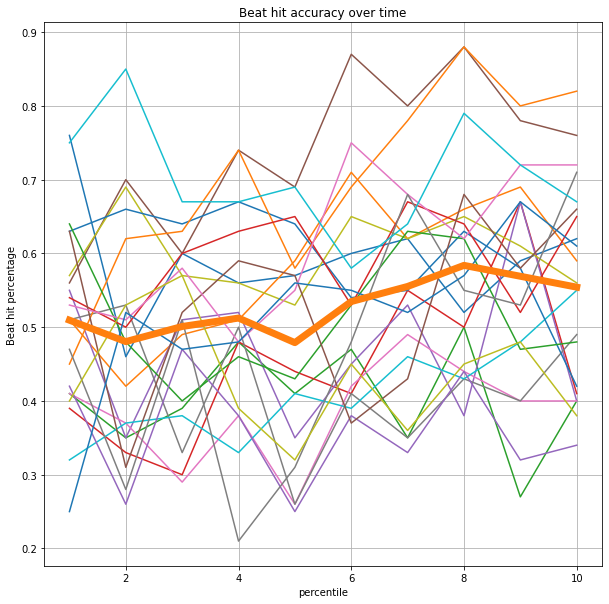

In [18]:
# only jumping actions

fig, ax=plt.subplots(figsize=(10,10))

divisions = 10
all_avg = []
for f in beat_metrics_controlled:
    
    df_beat = pd.read_csv(os.path.join(mypath, f),sep=',', skiprows = 1)
    df_beat = df_beat[df_beat["Action"].isin(["Double Jump", "Jump"])]
    #print(df_beat)
    time = np.array(df_beat["Time"])
    hits = np.array(df_beat["Beathit"])
    percentile = time.max()/divisions
    #print(percentile)
    avg = []
    #print(time.max())
    for i in range(divisions):
        #print(i, "low",i* percentile,"high", (i+1)* percentile)
        time_filter_low = (i* percentile) < time
        time_filter_high = time < ((i+1)* percentile)
        time_filter = np.logical_and(time_filter_low, time_filter_high)
        #print(list(zip(time_filter,time)))
        this_percentile = hits[time_filter]
        #print(len(this_percentile))
        if len(this_percentile) == 0:
            avg.append(0)
        else:
            avg.append(round(np.count_nonzero(this_percentile)/len(this_percentile),2))
    #print(avg)
    ax.plot(np.arange(1,divisions+1),avg)
    all_avg.append(avg)

all_avg = np.array(all_avg)
print(all_avg)
np.mean(all_avg, axis = 0)
ax.plot(np.arange(1,divisions+1),np.mean(all_avg, axis = 0),linewidth=7.0)
ax.set_title("Beat hit accuracy over time")
ax.set_ylabel("Beat hit percentage")
ax.set_xlabel("percentile")
ax.grid(True)
plt.show()  

BeatMetric Things

missedBySeconds is beatdelta

b = missedBySeconds <= (ToleranceRange + toleranceShift) || missedBySeconds >= beatLength - (ToleranceRange - toleranceShift)

Attacks that you cannot miss:
["Player Attack SpinAttack","Player Attack StaggerAttack 3","Player Attack WindUpAttack 2","Player Attack StrongAttack 1"]

Attack that you allways miss: 
["Player Attack Weak Attack"]

Attack you can both fail and hit:
["Player Attack Dash"]

Jumps
["Jump", "Double Jump"]
You can hit/fail both jump types

Independant of Beat:
["Player Shielded"]




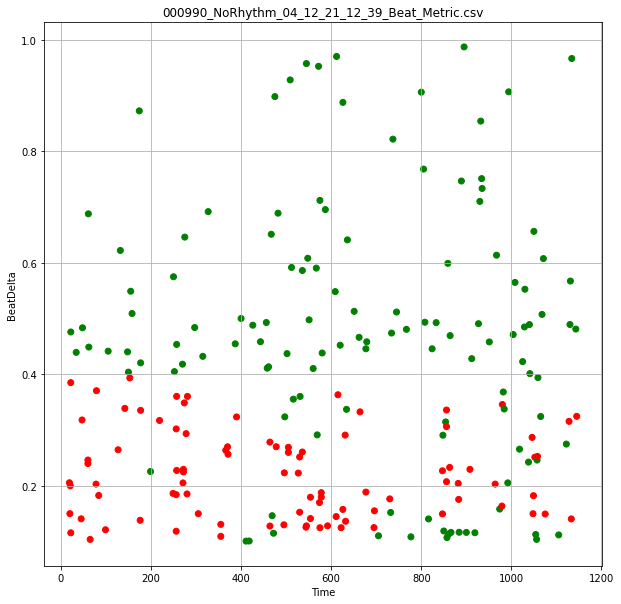

In [82]:
# beat-deltas colored. green is hit and red is no hit
#print(df_beat)
fig, ax=plt.subplots(figsize=(10,10))
colors = np.where(df_beat["Beathit"], "green", "red")
ax.scatter(df_beat["Time"],df_beat["BeatDelta"], color = colors)
ax.set_title(beat_metrics[index])
ax.set_ylabel("BeatDelta")
ax.set_xlabel("Time")
ax.grid(True)
plt.show()

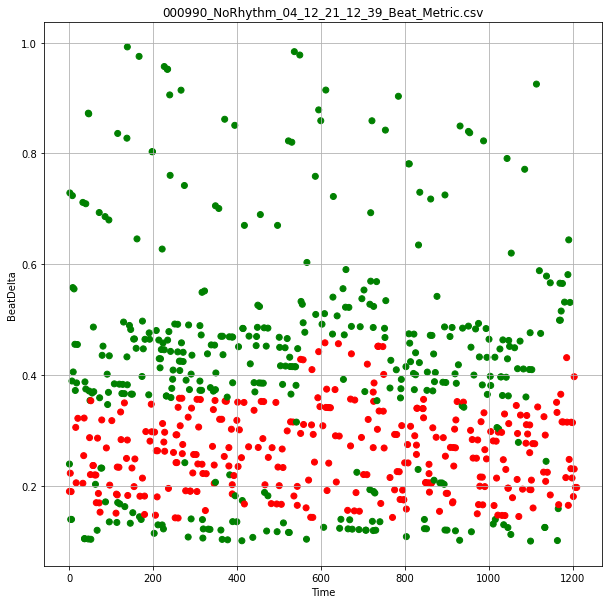

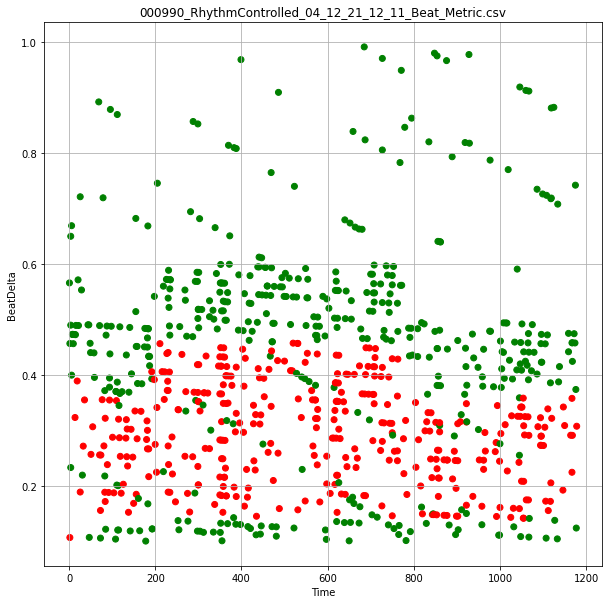

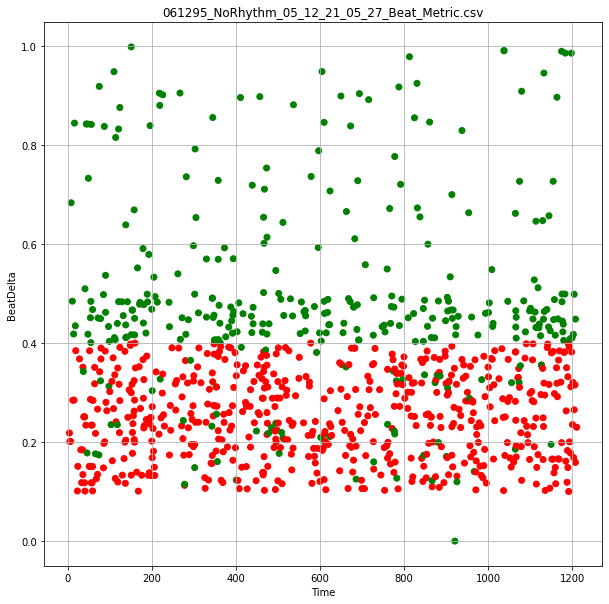

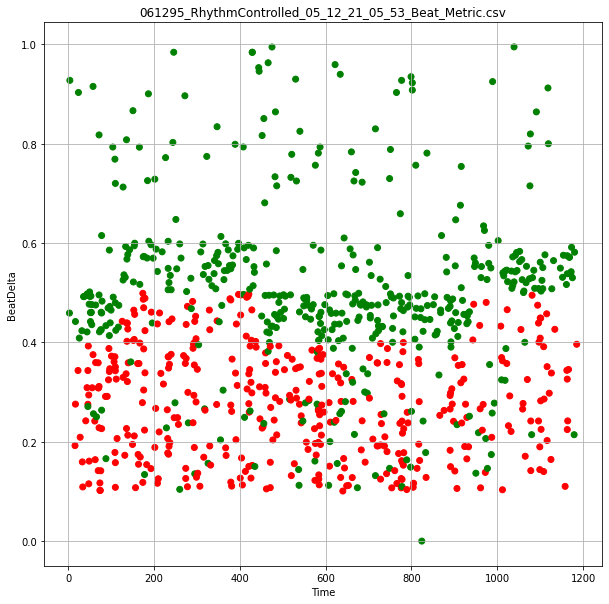

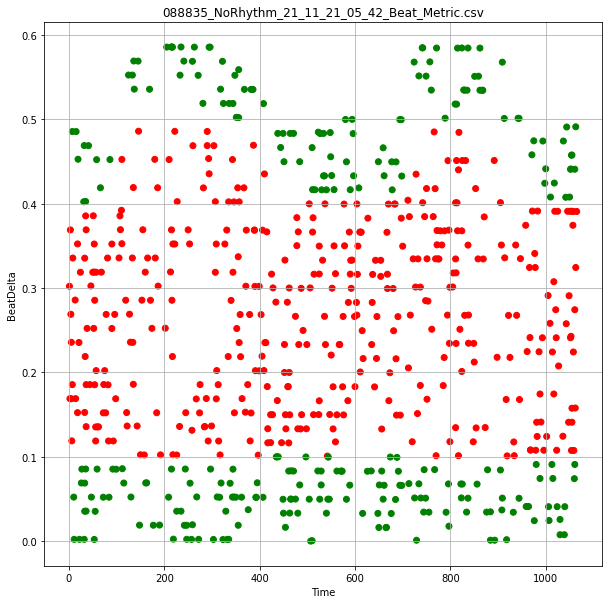

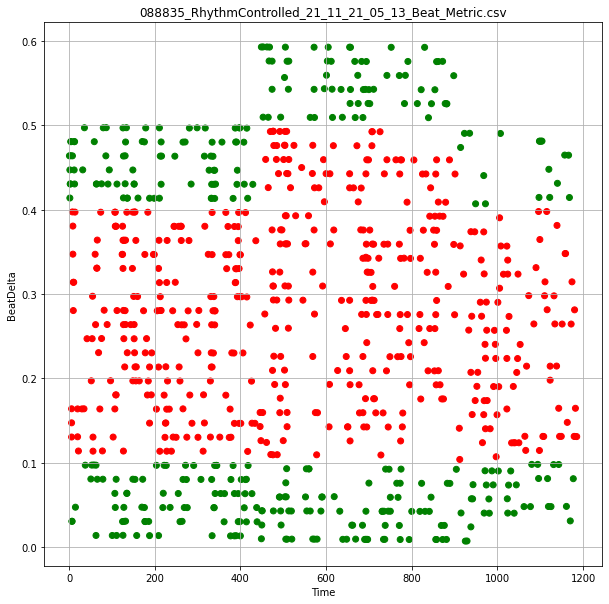

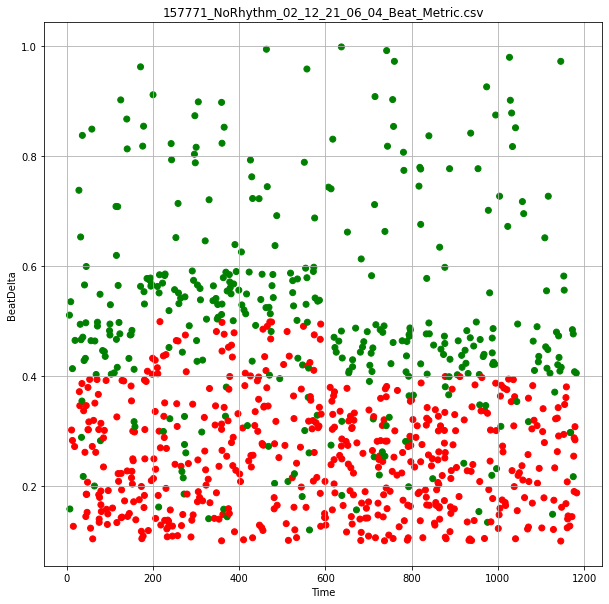

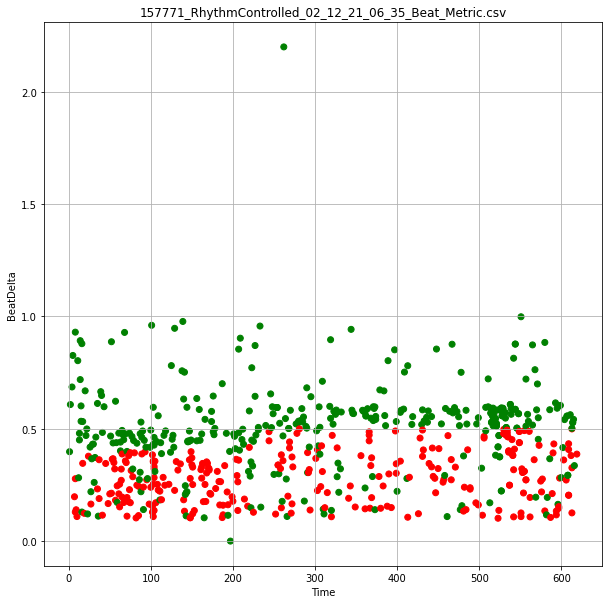

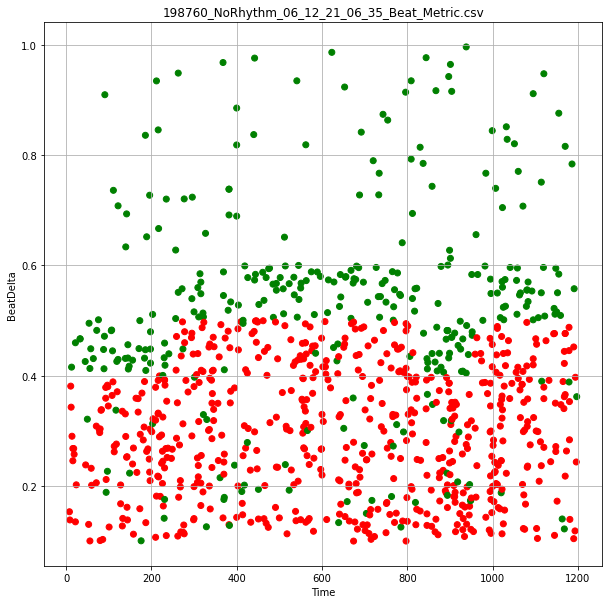

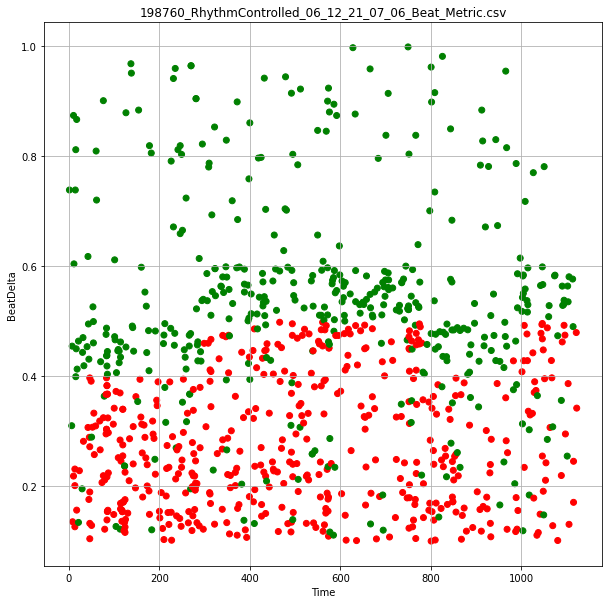

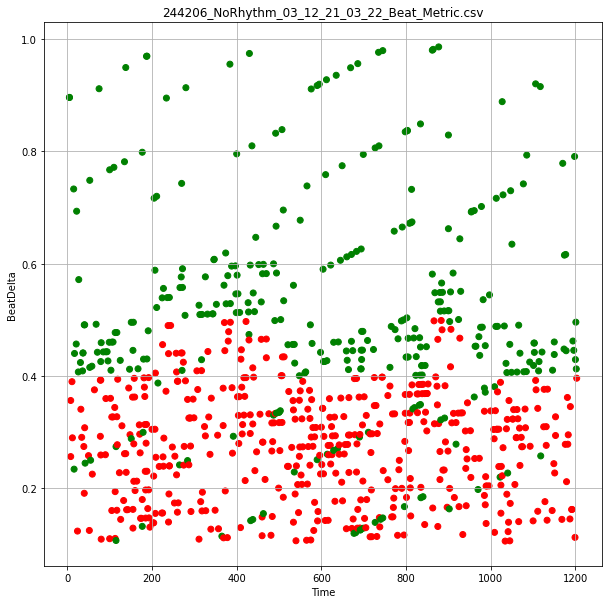

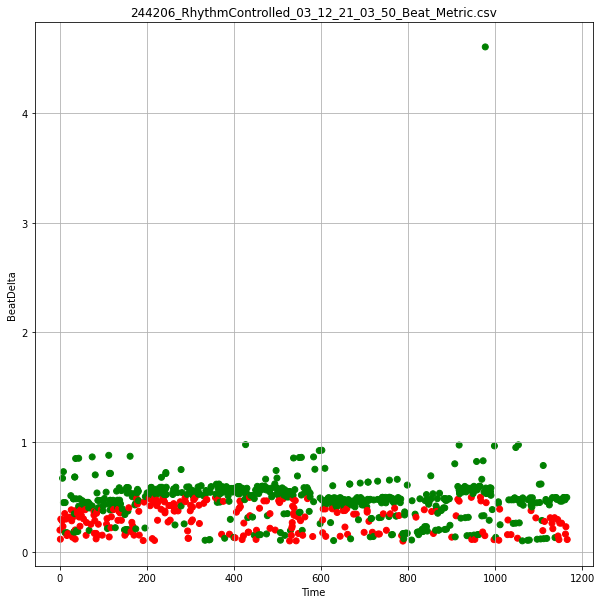

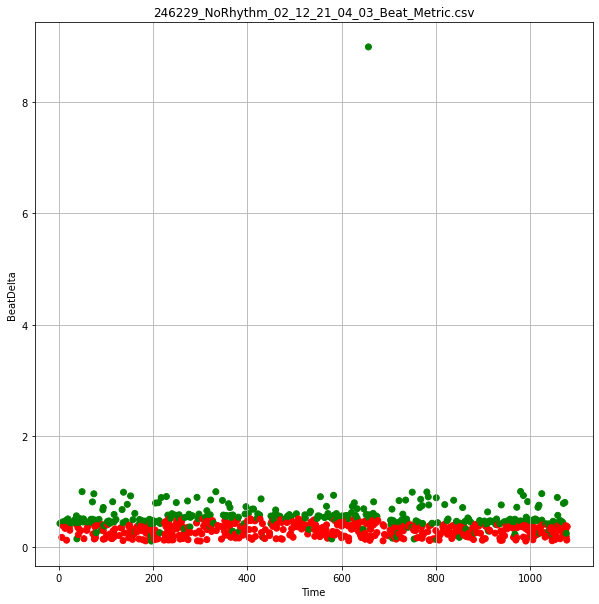

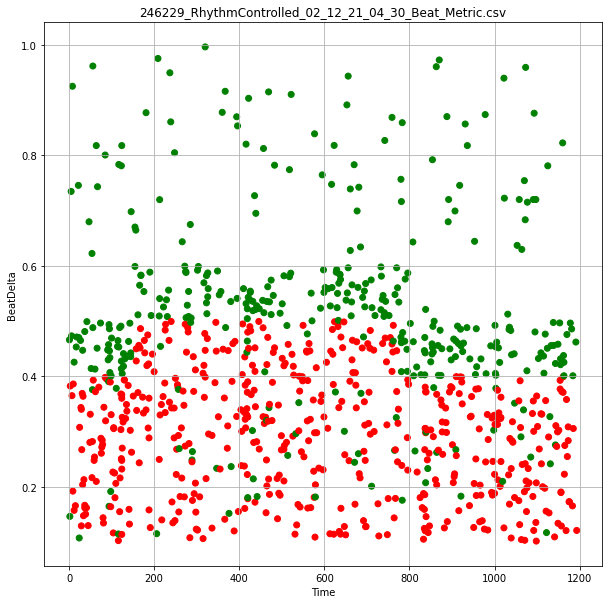

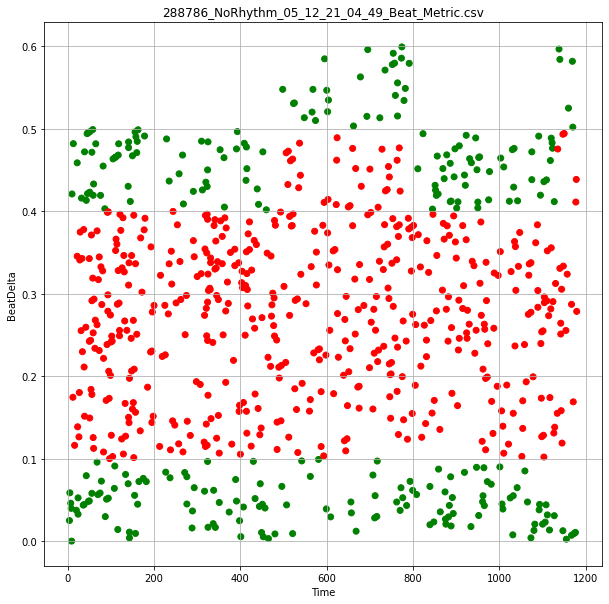

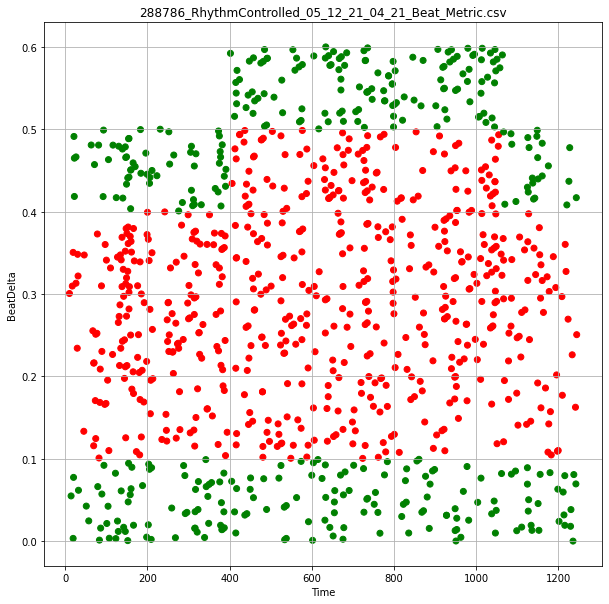

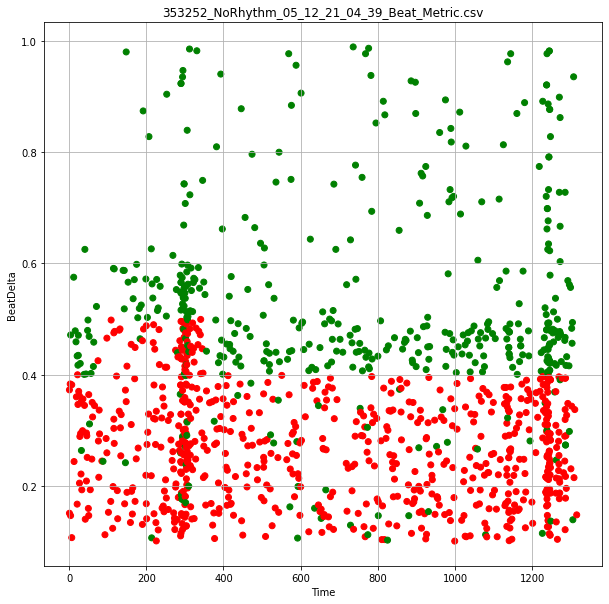

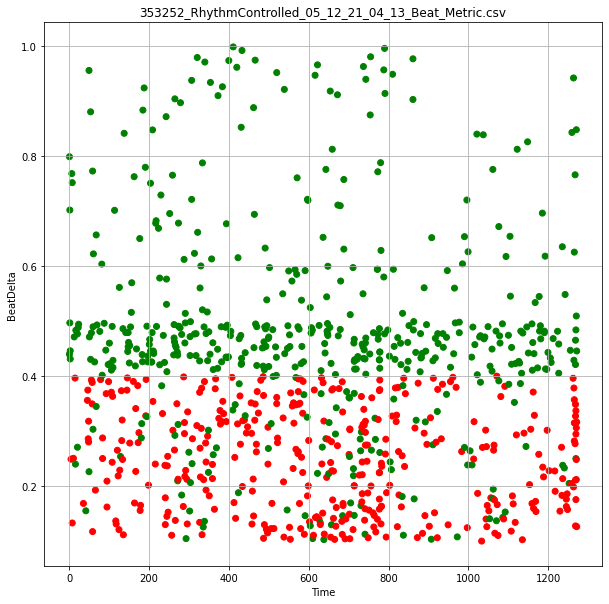

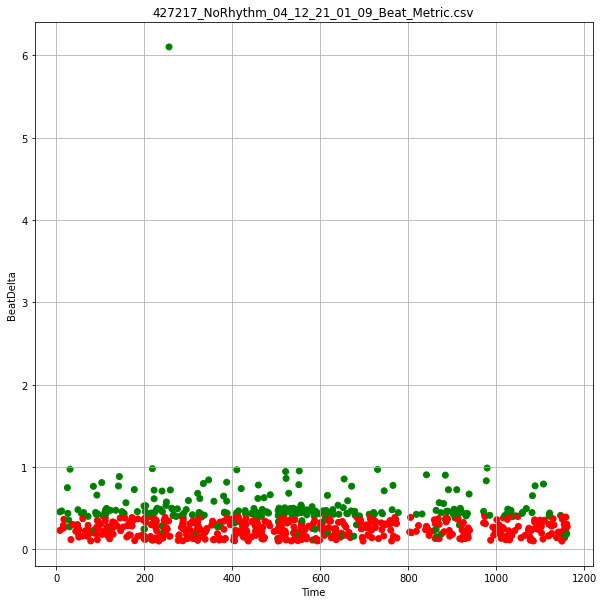

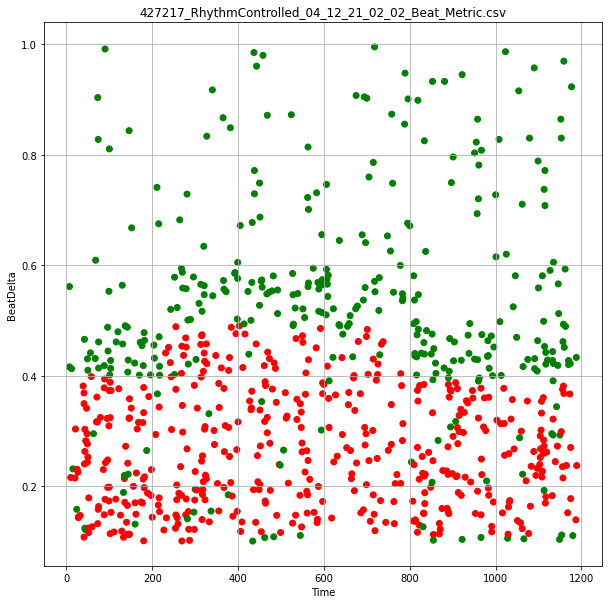

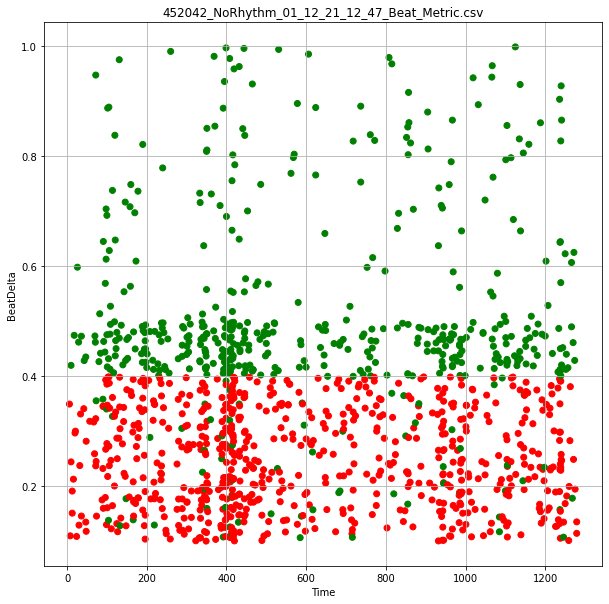

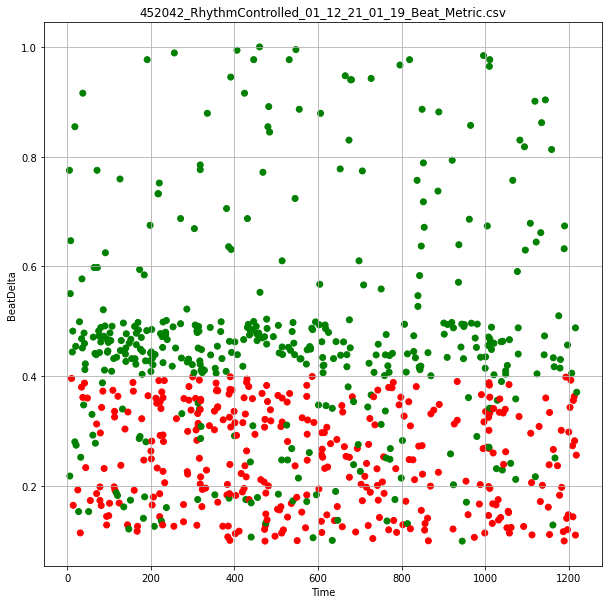

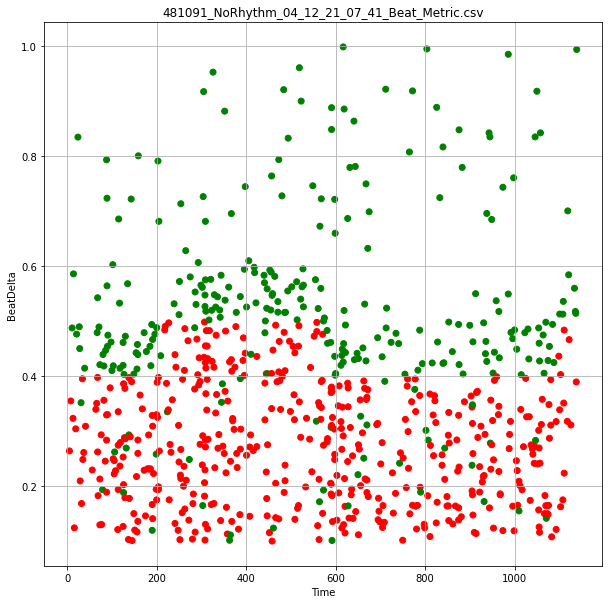

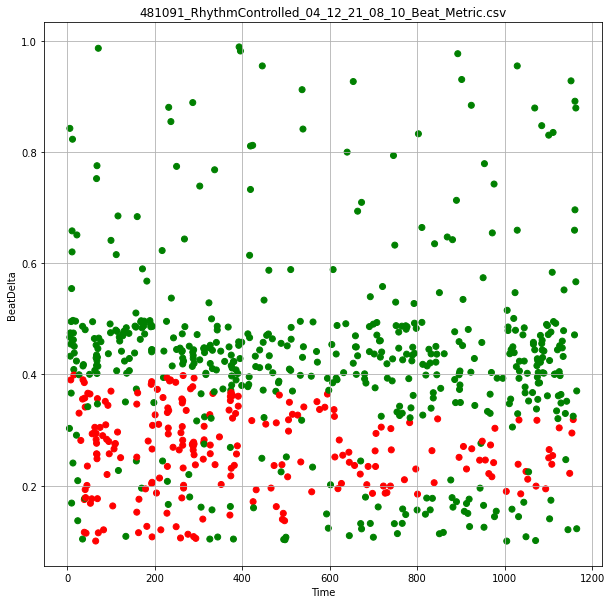

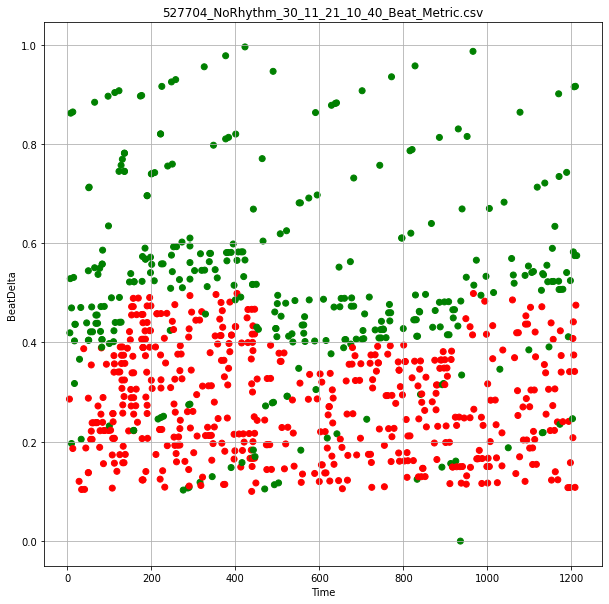

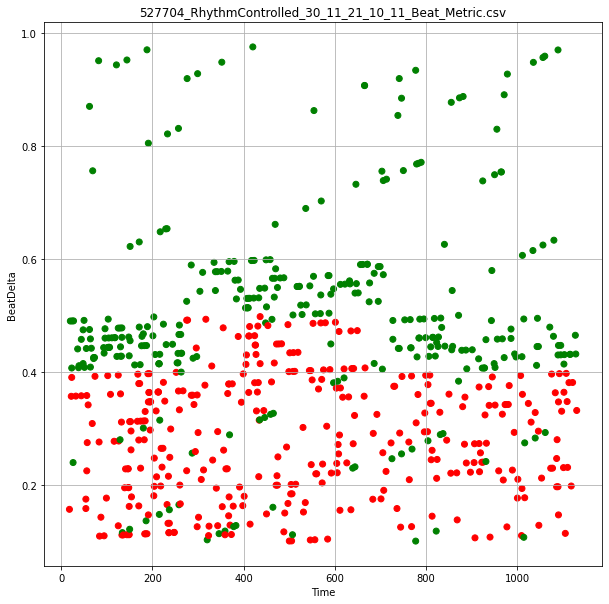

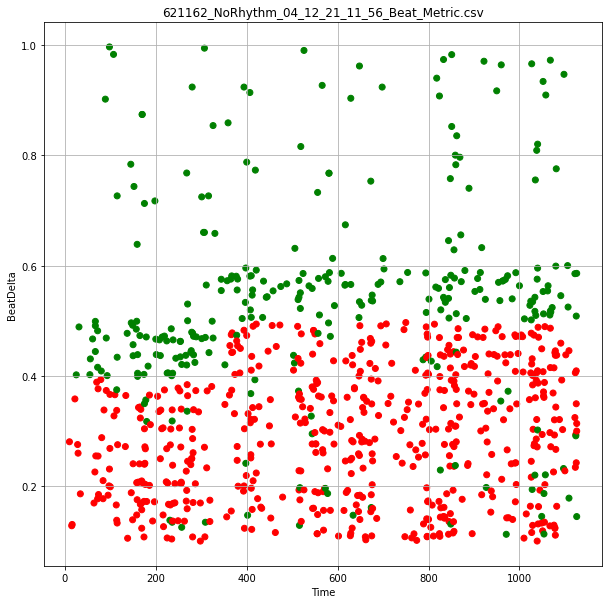

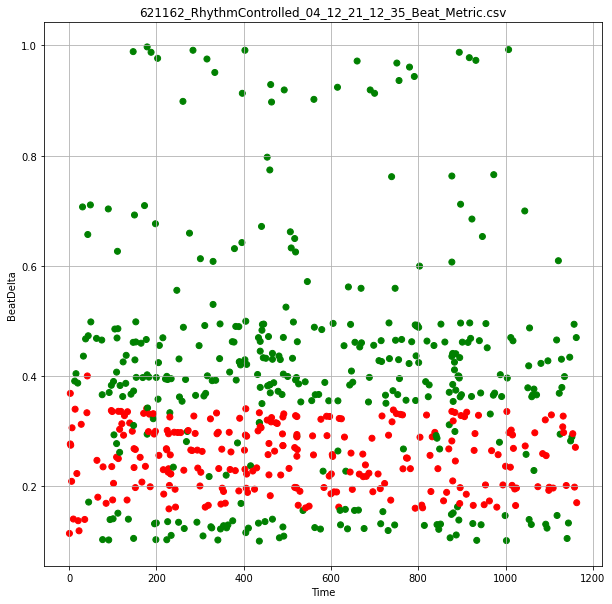

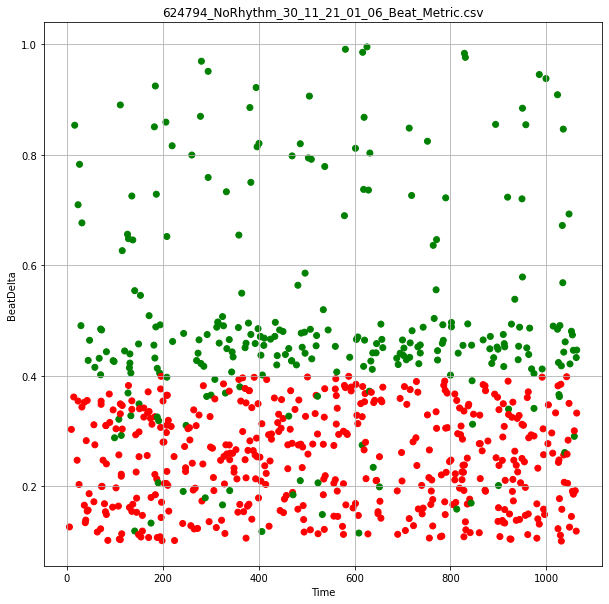

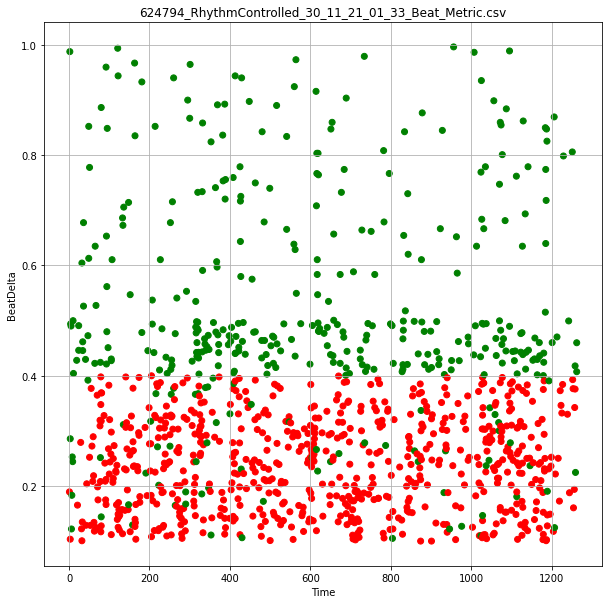

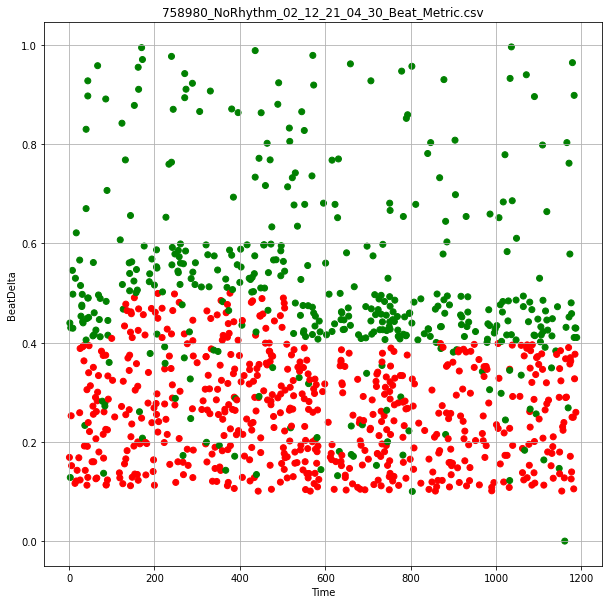

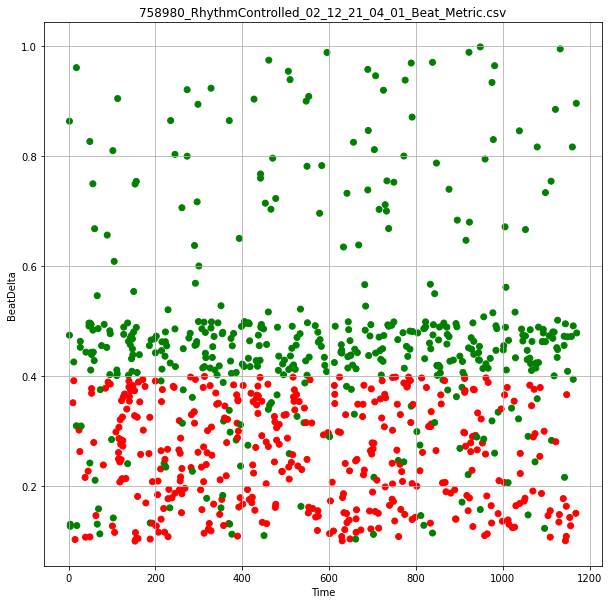

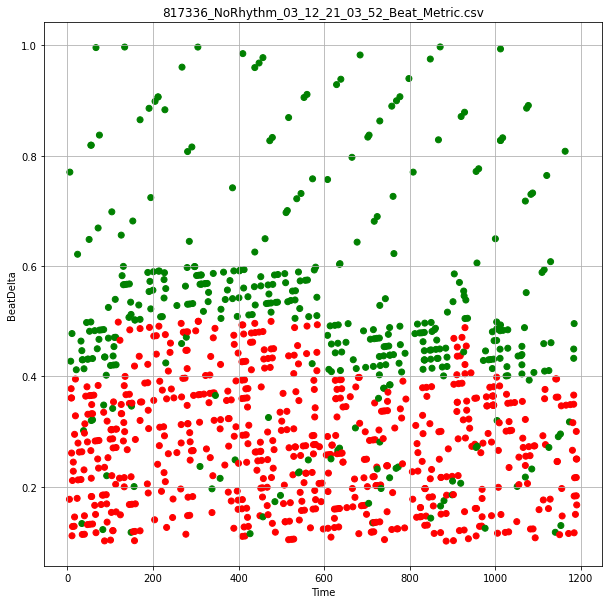

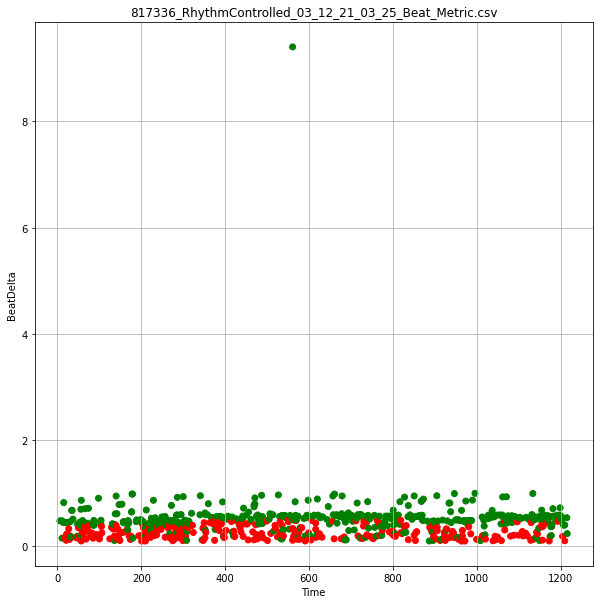

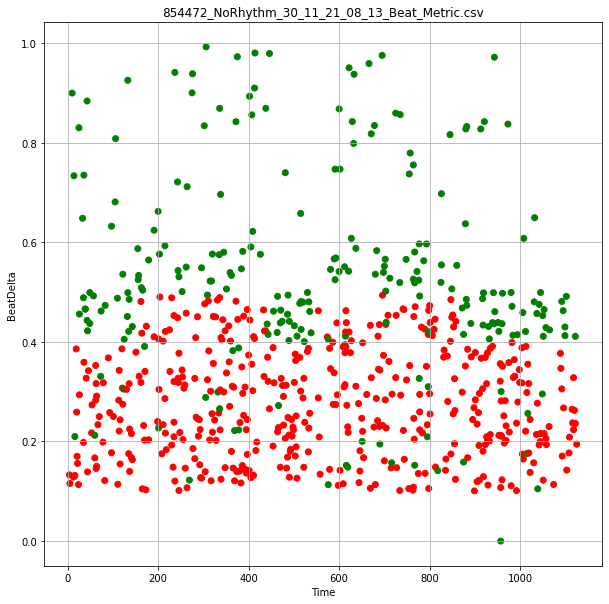

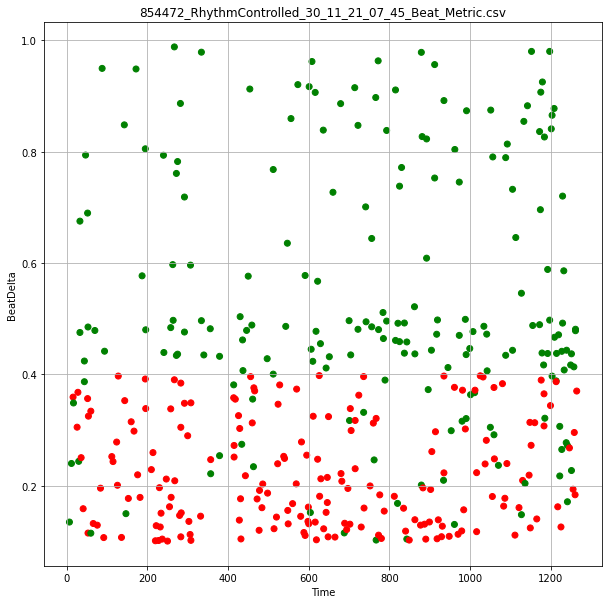

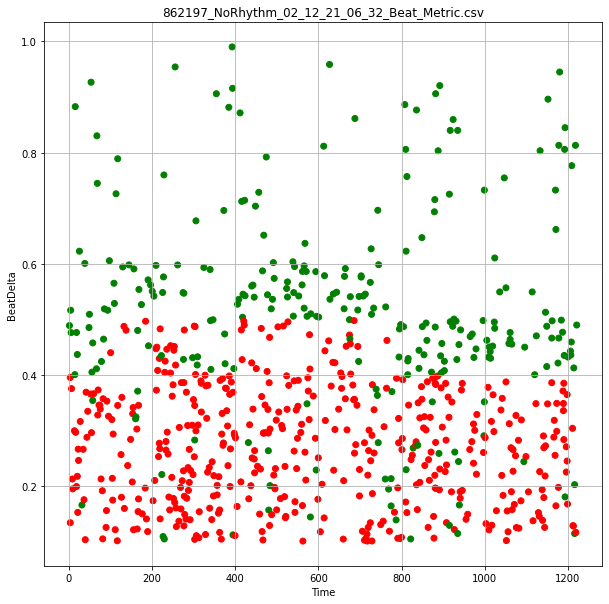

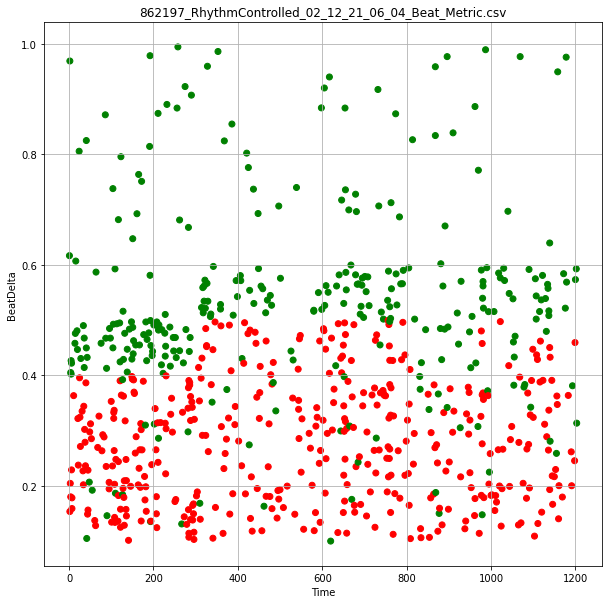

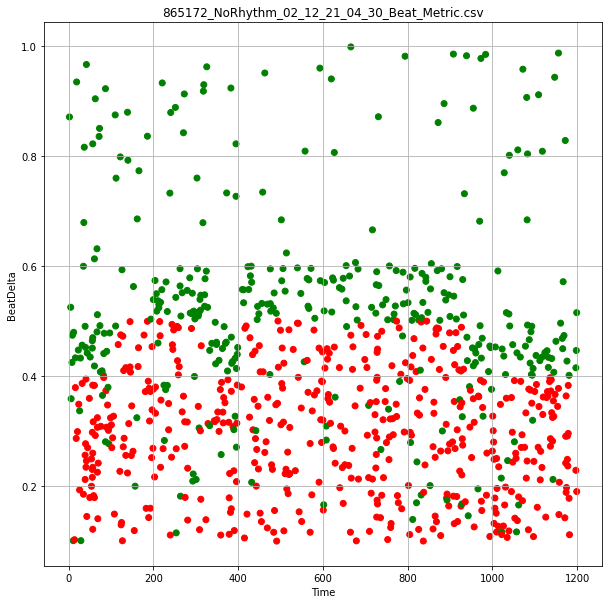

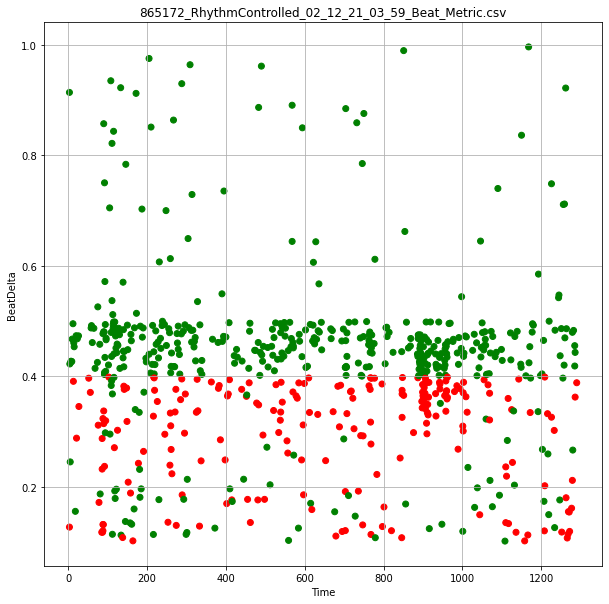

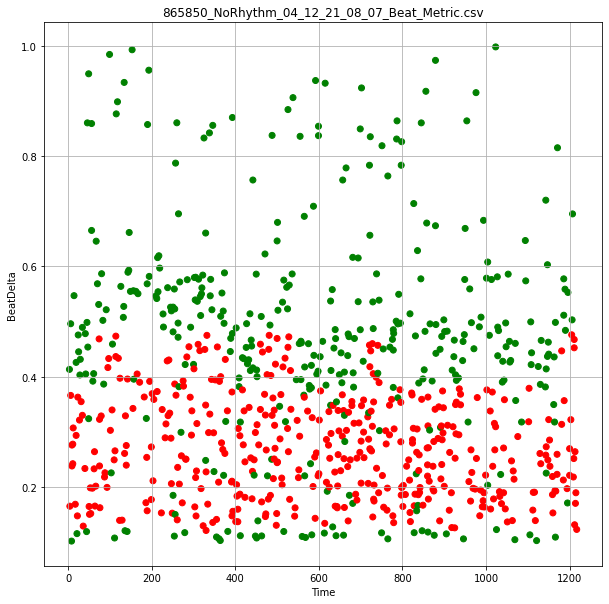

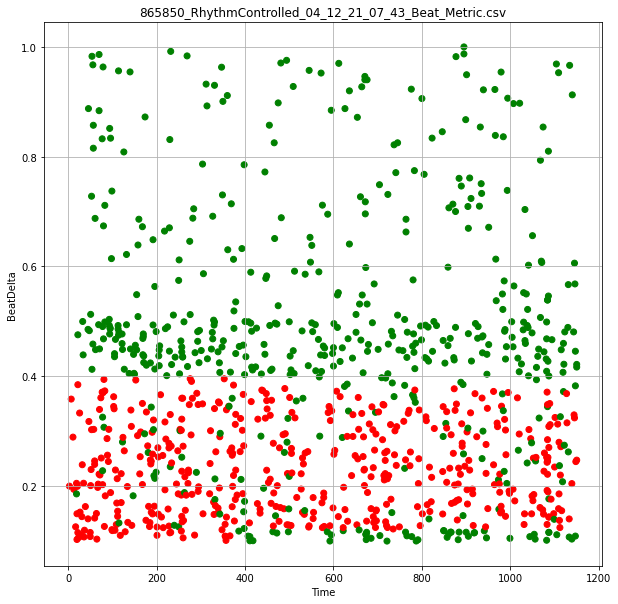

In [7]:


for file in beat_metrics:
    Beat_Analysis(file)